In [2]:
# Import yfinance package
import yfinance as yf
import numpy as np

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Create ticker object for Microsoft
msft = yf.Ticker('INFY')

# Call the options on the ticker object to get the expiration dates
msft.options

('2024-06-21',
 '2024-07-19',
 '2024-08-16',
 '2024-10-18',
 '2025-01-17',
 '2025-06-20',
 '2026-01-16',
 '2026-03-20')

In [12]:
# Get options chain for specific expiration date
option_chain = msft.option_chain(date=msft.options[0])

In [13]:
# Get Microsoft calls options chain data
option_chain.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,INFY240621C00011000,2024-05-17 17:13:05+00:00,11.0,6.08,5.90,8.6,0.0,0.0,1.0,0,4.578129,True,REGULAR,USD
1,INFY240621C00014000,2024-06-06 14:57:04+00:00,14.0,3.55,3.80,5.3,0.0,0.0,10.0,10,3.535157,True,REGULAR,USD
2,INFY240621C00015000,2024-06-13 14:01:19+00:00,15.0,2.92,2.80,4.6,0.0,0.0,6.0,6,3.214846,True,REGULAR,USD
3,INFY240621C00016000,2024-06-06 13:54:31+00:00,16.0,1.50,1.80,3.7,0.0,0.0,1.0,13,2.648441,True,REGULAR,USD
4,INFY240621C00017000,2024-06-18 19:48:15+00:00,17.0,0.95,0.85,1.0,0.0,0.0,614.0,1351,0.609379,True,REGULAR,USD


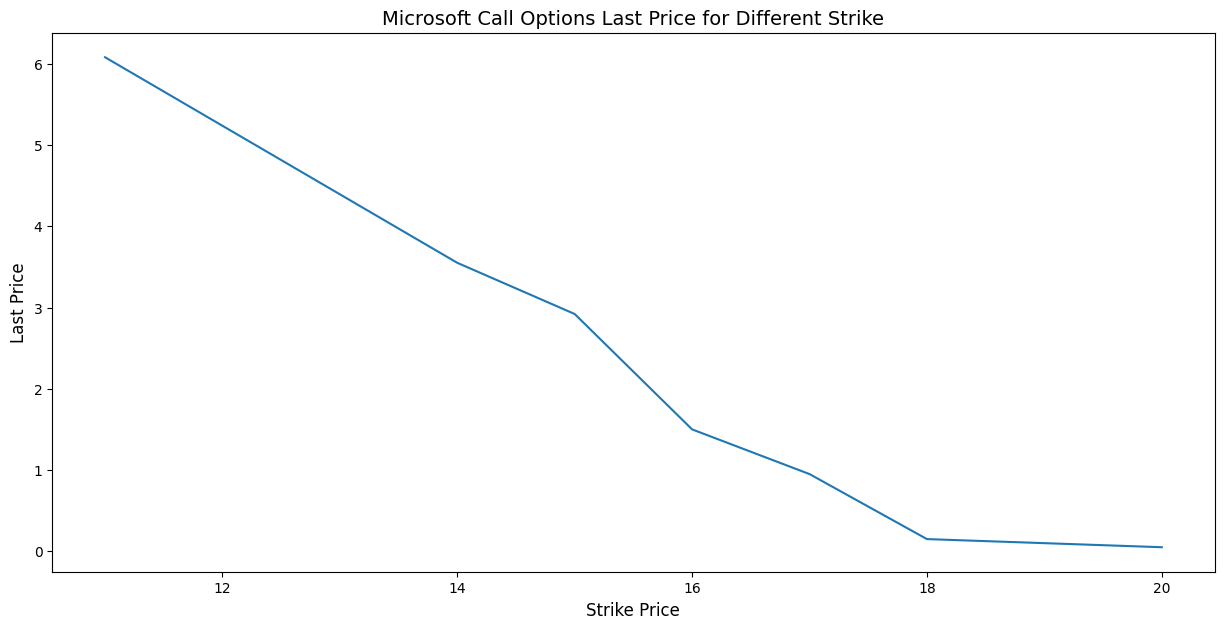

In [14]:
# Convert data to numpy arrays
call_strike_prices = np.array(option_chain.calls.strike)
call_last_prices = np.array(option_chain.calls.lastPrice)

# Plot call strike price vs call last traded price 
plt.figure(figsize=(15, 7))
plt.plot(call_strike_prices, call_last_prices)
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Call Options Last Price for Different Strike', fontsize=14)
plt.show()

In [15]:
# Get Microsoft puts options chain data
option_chain.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,INFY240621P00015000,2024-06-07 14:27:30+00:00,15.0,0.03,0.00,0.75,0.00,0.000000,1,21,2.300785,False,REGULAR,USD
1,INFY240621P00016000,2024-06-05 13:56:51+00:00,16.0,0.05,0.00,0.75,0.00,0.000000,2,261,1.746095,False,REGULAR,USD
2,INFY240621P00017000,2024-06-17 18:11:25+00:00,17.0,0.01,0.00,0.10,0.00,0.000000,4,292,0.500005,False,REGULAR,USD
3,INFY240621P00018000,2024-06-18 19:07:39+00:00,18.0,0.25,0.20,0.30,0.05,24.999998,1098,281,0.388678,True,REGULAR,USD
4,INFY240621P00019000,2024-06-14 13:31:12+00:00,19.0,1.30,1.05,1.40,0.00,0.000000,2,2,0.753909,True,REGULAR,USD


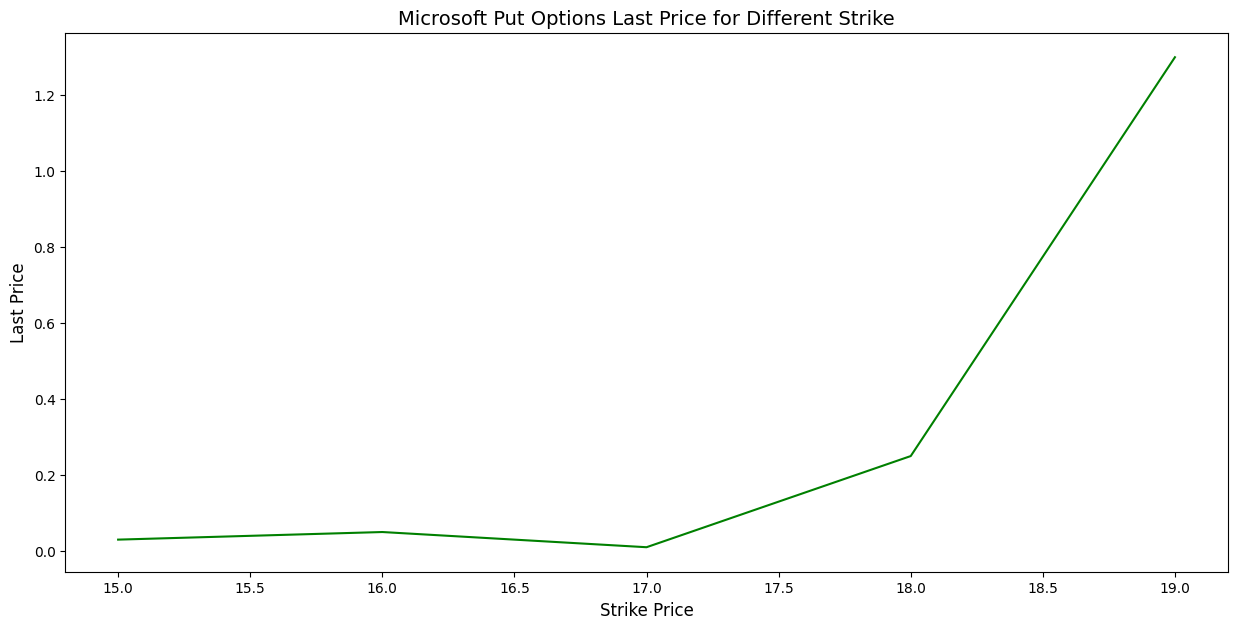

In [16]:
# Convert data to numpy arrays
put_strike_prices = np.array(option_chain.puts.strike)
put_last_prices = np.array(option_chain.puts.lastPrice)

# Plot put strike price vs put last traded price
plt.figure(figsize=(15, 7))
plt.plot(put_strike_prices, put_last_prices, color='g')
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Put Options Last Price for Different Strike', fontsize=14)
plt.show()